In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def build_displots_without_nan(data, columns, n_col=1, name='displots'):
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(20, 16))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        cur_data = data[~data[columns[0]].isna()][columns[0]]
        try:
            try:
                sns_plot = sns.distplot(cur_data, ax=ax, color='blue')
            except:
                sns_plot = sns.distplot(cur_data, ax=ax, color='red', kde_kws={'bw': 0.1})
        except:
            sns_plot = cur_data.hist(ax=axes[0], color='green')
        ax.set_title(columns[0])
        plt.show()
    elif n_col >= len(columns):
        fig, axes = plt.subplots(1, n_col, figsize=(20, 16 // n_col))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[idx], color='green')
            axes[idx].set_title(columns[idx])
        plt.show()
    else:
        m = n_col
        n = (len(columns) + m - 1) // m
        fig, axes = plt.subplots(n, m, figsize=(20, n * (16 // m)))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            i, j = idx // m, idx % m
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[i, j], color='green')
            axes[i, j].set_title(columns[idx])
        plt.show()
    return

In [50]:
mba_1 = pd.read_csv('../data/mba_segment_1.csv', index_col=[0])
mba_2 = pd.read_csv('../data/mba_segment_2.csv', index_col=[0])
mba_3 = pd.read_csv('../data/mba_segment_3.csv', index_col=[0])
mba_4 = pd.read_csv('../data/mba_segment_4.csv', index_col=[0])
mba_5 = pd.read_csv('../data/mba_segment_5.csv', index_col=[0])

In [51]:
mba_1

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt
121,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ЖЕНСКИЕ ШТУЧКИ,0.001040,0.108696,11.877470,82,117.70,235.32,50.02
21,ЖЕНСКИЕ ШТУЧКИ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,0.001040,0.113636,11.877470,78,141.56,634.04,22.33
128,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,СОПУТСТВУЮЩИЕ ТОВАРЫ,0.000416,0.043478,3.699885,88,107.49,351.19,30.61
105,СОПУТСТВУЮЩИЕ ТОВАРЫ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,0.000416,0.035398,3.699885,109,141.56,634.04,22.33
142,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,0.001144,0.028497,2.978599,375,141.56,634.04,22.33
130,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,0.001144,0.119565,2.978599,81,119.87,1730.11,6.93
99,СОПУТСТВУЮЩИЕ ТОВАРЫ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",0.003640,0.309735,2.621837,78,163.90,631.33,25.96
43,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",СОПУТСТВУЮЩИЕ ТОВАРЫ,0.003640,0.030810,2.621837,1101,107.49,351.19,30.61
14,ЖЕНСКИЕ ШТУЧКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",0.002704,0.295455,2.500960,62,163.90,631.33,25.96
37,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ЖЕНСКИЕ ШТУЧКИ,0.002704,0.022887,2.500960,1110,117.70,235.32,50.02


In [40]:
def add_income(mba_df):
    mba_df['income_0'] = mba_df['mean_marga_rcpt'] * mba_df['num_target']
    mba_df['income_5'] = round((mba_df['max_gain_rcpt'] - 5) / 100 * mba_df['num_target'] * mba_df['mean_price_rcpt'], 2)
    mba_df['income_10'] = round((mba_df['max_gain_rcpt'] - 10) / 100 * mba_df['num_target'] * mba_df['mean_price_rcpt'] * mba_df['confidence'], 2)
    mba_df['income_15']  = round((mba_df['max_gain_rcpt'] - 15) / 100 * mba_df['num_target'] * mba_df['mean_price_rcpt'] * mba_df['confidence'], 2)
    mba_df['income_20']  = round((mba_df['max_gain_rcpt'] - 20) / 100 * mba_df['num_target'] * mba_df['mean_price_rcpt'] * mba_df['confidence'], 2)
    mba_df['income_25']  = round((mba_df['max_gain_rcpt'] - 25) / 100 * mba_df['num_target'] * mba_df['mean_price_rcpt'] * mba_df['confidence'], 2)
    mba_df['income_30']  = round((mba_df['max_gain_rcpt'] - 30) / 100 * mba_df['num_target'] * mba_df['mean_price_rcpt'] * mba_df['confidence'], 2)
    mba_df['income_35']  = round((mba_df['max_gain_rcpt'] - 35) / 100 * mba_df['num_target'] * mba_df['mean_price_rcpt'] * mba_df['confidence'], 2)
    return mba_df

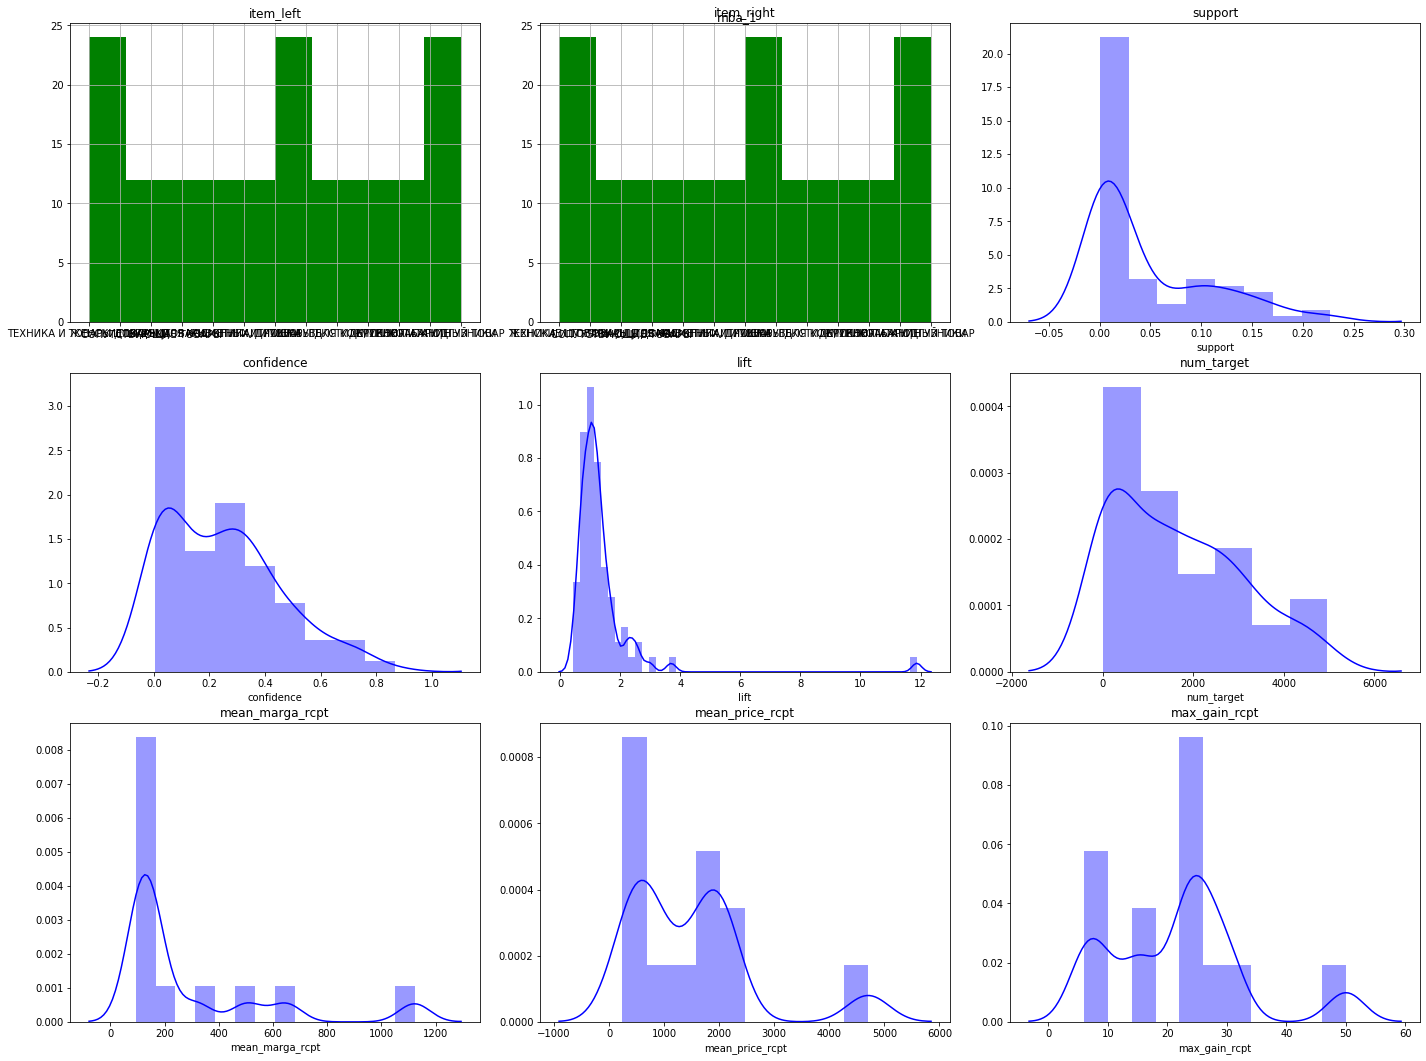

In [6]:
build_displots_without_nan(mba_1, mba_1.columns, n_col=3, name='mba_1')

In [41]:
mba_1 = add_income(mba_1)
mba_1 = mba_1[mba_1['lift'] > 1]
mba_1 = mba_1[mba_1['support'] >= 0.03]
mba_1 = mba_1.sort_values(by=['lift', 'confidence'], ascending=False)
mba_1

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income_0,income_5,income_10,income_15,income_20,income_25,income_30,income_35
148,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,0.145071,0.542590,1.754978,1176,93.27,615.34,15.16,109685.52,39892.23,20260.23,628.22,-19003.78,-38635.78,-58267.78,-77899.79
59,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,0.145071,0.469223,1.754978,1578,139.57,893.40,15.62,220241.46,70251.69,37176.51,4101.32,-28973.86,-62049.04,-95124.22,-128199.41
38,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ИГРУШКИ,0.087978,0.744718,1.644365,290,317.89,1351.56,23.52,92188.10,54058.79,39464.09,24869.38,10274.67,-4320.03,-18914.74,-33509.45
26,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",0.087978,0.194259,1.644365,3509,163.90,631.33,25.96,575125.10,90201.40,68683.89,47166.38,25648.87,4131.36,-17386.15,-38903.66
80,ОБУВЬ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.116889,0.724694,1.619864,427,648.32,2194.74,29.54,276832.64,166663.32,132705.84,98748.36,64790.87,30833.39,-3124.09,-37081.57
114,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОБУВЬ,0.116889,0.261274,1.619864,3178,503.48,1964.11,25.63,1600059.44,336445.58,254902.79,173359.99,91817.19,10274.39,-71268.41,-152811.20
41,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ОБУВЬ,0.030262,0.256162,1.588171,845,503.48,1964.11,25.63,425440.60,87707.43,66450.18,45192.92,23935.67,2678.41,-18578.84,-39836.10
75,ОБУВЬ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",0.030262,0.187621,1.588171,1260,163.90,631.33,25.96,206514.00,31282.36,23819.96,16357.57,8895.17,1432.78,-6029.61,-13492.01
3,ДЕТСКОЕ ПИТАНИЕ,КОСМЕТИКА/ГИГИЕНА,0.112105,0.427948,1.384172,1441,93.27,615.34,15.16,134402.07,38553.47,19580.30,607.14,-18366.02,-37339.18,-56312.35,-75285.51
48,КОСМЕТИКА/ГИГИЕНА,ДЕТСКОЕ ПИТАНИЕ,0.112105,0.362597,1.384172,1895,112.43,1863.70,6.03,213054.85,13190.05,-50839.30,-114868.65,-178898.00,-242927.34,-306956.69,-370986.04


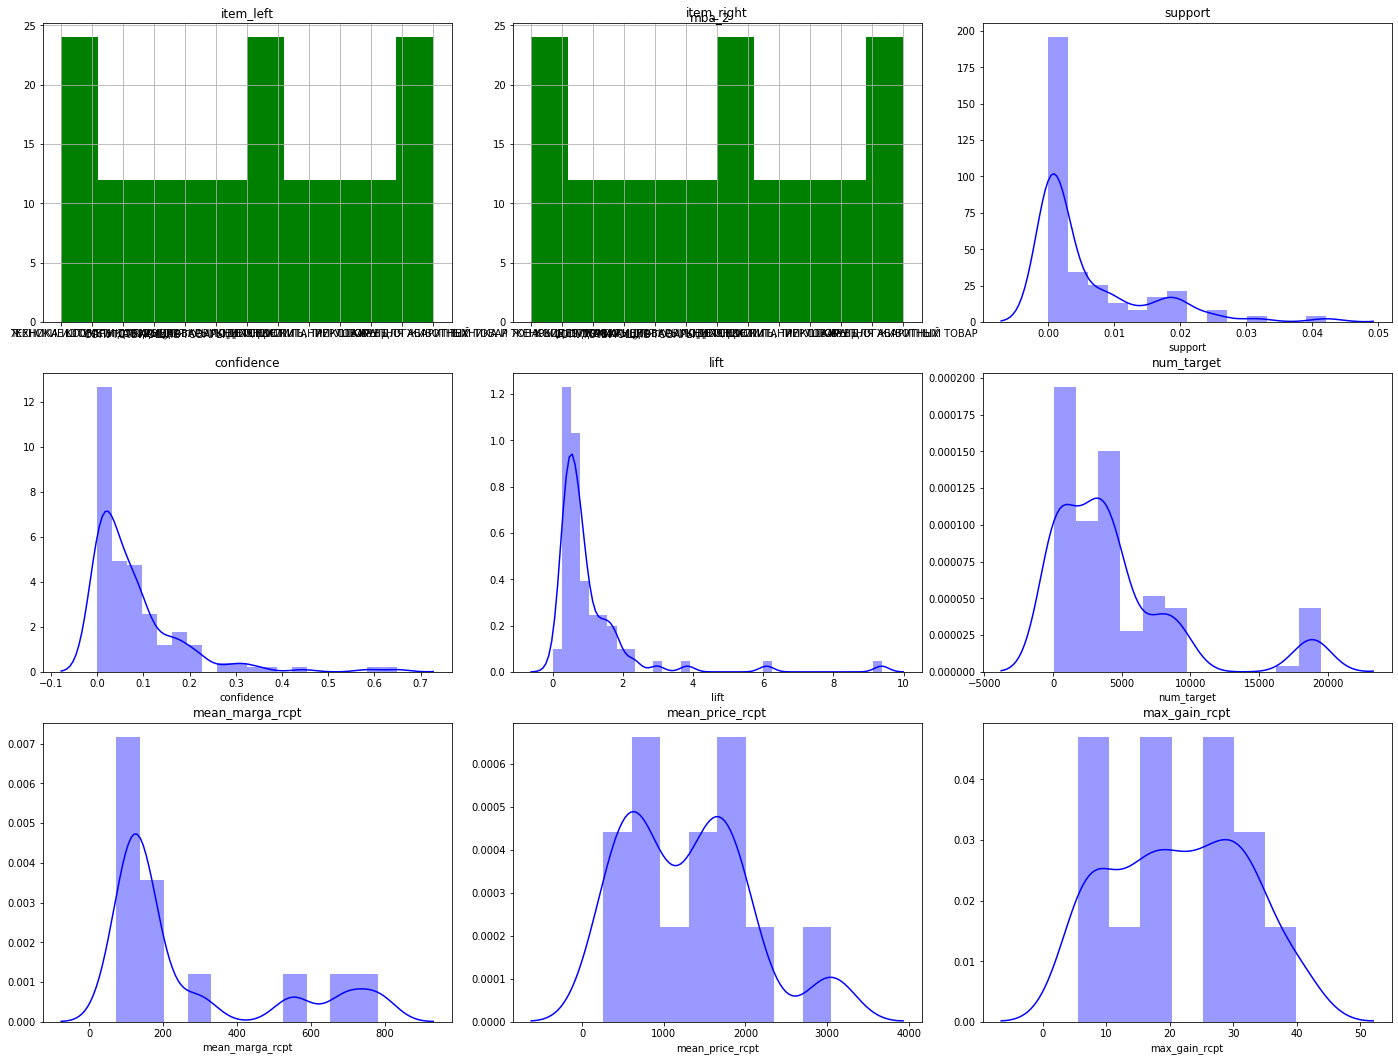

In [8]:
build_displots_without_nan(mba_2, mba_2.columns, n_col=3, name='mba_2')

In [52]:
mba_2 = add_income(mba_2)
mba_2 = mba_2[mba_2['lift'] > 1]
mba_2 = mba_2[mba_2['support'] >= 0.01]
mba_2 = mba_2.sort_values(by=['lift', 'confidence'], ascending=False)
mba_2

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income_0,income_5,income_10,income_15,income_20,income_25,income_30,income_35
148,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,0.020611,0.222928,2.319496,3301,102.46,663.51,15.44,338220.46,50975.20,26561.79,2148.38,-22265.03,-46678.44,-71091.85,-95505.27
59,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,0.020611,0.214447,2.319496,3469,143.98,967.29,14.88,499466.62,71094.97,35115.73,-863.50,-36842.74,-72821.97,-108801.20,-144780.44
54,КОСМЕТИКА/ГИГИЕНА,ПОДГУЗНИКИ,0.031515,0.327899,1.874341,2968,136.86,1711.38,8.00,406200.48,49965.60,-33310.40,-116586.40,-199862.40,-283138.40,-366414.39,-449690.39
88,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,0.031515,0.180144,1.874341,6590,102.46,663.51,15.44,675211.40,82234.48,42850.15,3465.82,-35918.51,-75302.84,-114687.17,-154071.50
6,ДЕТСКОЕ ПИТАНИЕ,ПОДГУЗНИКИ,0.017803,0.306367,1.751262,1852,136.86,1711.38,8.00,253464.72,29130.69,-19420.46,-67971.60,-116522.75,-165073.89,-213625.04,-262176.19
84,ПОДГУЗНИКИ,ДЕТСКОЕ ПИТАНИЕ,0.017803,0.101767,1.751262,7220,73.37,1320.29,5.56,529731.40,5432.50,-43071.98,-91576.45,-140080.93,-188585.41,-237089.89,-285594.37
151,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ПОДГУЗНИКИ,0.020480,0.221516,1.266235,3307,136.86,1711.38,8.00,452596.02,37610.32,-25073.55,-87757.41,-150441.28,-213125.14,-275809.01,-338492.87
95,ПОДГУЗНИКИ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,0.020480,0.117069,1.266235,7097,143.98,967.29,14.88,1021826.06,79401.75,39218.68,-964.39,-41147.47,-81330.54,-121513.61,-161696.68
38,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ИГРУШКИ,0.025268,0.445169,1.048448,1447,295.71,1475.25,20.04,427892.37,142924.48,95409.69,47894.91,380.12,-47134.67,-94649.46,-142164.24
26,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",0.025268,0.059511,1.048448,18348,186.10,706.58,26.34,3414562.80,164642.40,126066.40,87490.39,48914.38,10338.37,-28237.64,-66813.65


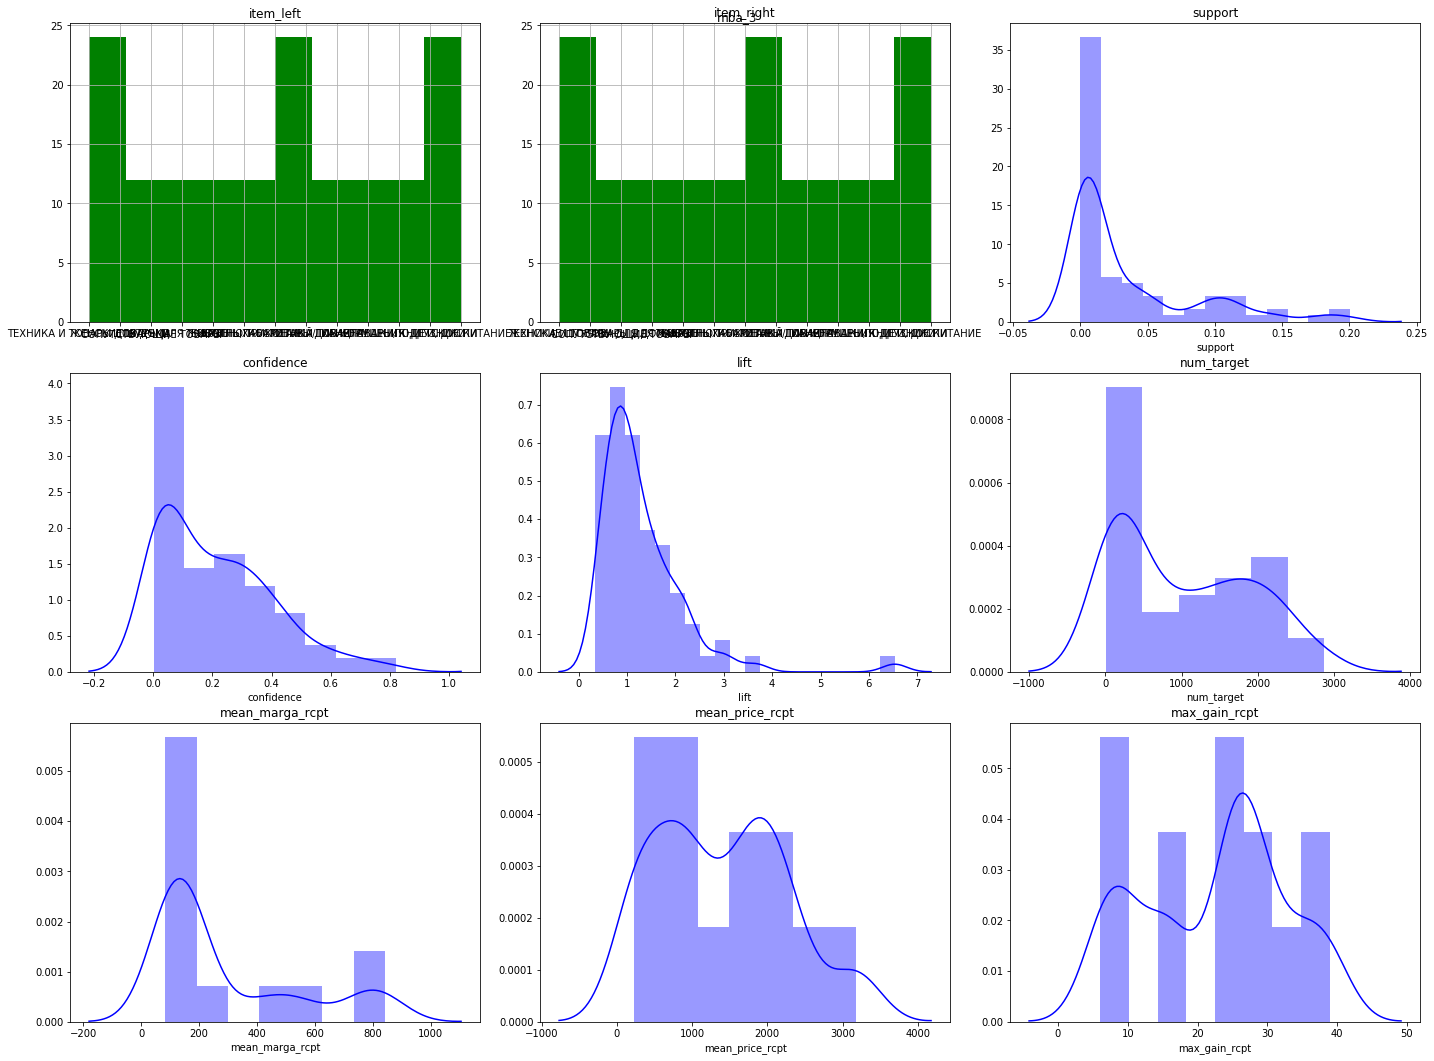

In [9]:
build_displots_without_nan(mba_3, mba_3.columns, n_col=3, name='mba_3')

In [46]:
mba_3 = add_income(mba_3)
mba_3 = mba_3[mba_3['lift'] > 1]
mba_3 = mba_3[mba_3['support'] >= 0.03]
mba_3 = mba_3.sort_values(by=['lift', 'confidence'], ascending=False)
mba_3

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income_0,income_5,income_10,income_15,income_20,income_25,income_30,income_35
80,ОБУВЬ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.038659,0.682667,2.285449,119,762.09,2399.55,31.76,90688.71,52164.08,42417.43,32670.78,22924.13,13177.47,3430.82,-6315.83
114,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОБУВЬ,0.038659,0.129424,2.285449,1722,548.03,2021.17,27.11,943707.66,99595.20,77072.54,54549.88,32027.22,9504.56,-13018.10,-35540.76
71,КРУПНОГАБАРИТНЫЙ ТОВАР,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,0.056025,0.568147,2.144966,282,147.00,904.05,16.26,41454.00,16309.50,9067.27,1825.04,-5417.19,-12659.42,-19901.65,-27143.88
149,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КРУПНОГАБАРИТНЫЙ ТОВАР,0.056025,0.211517,2.144966,1383,842.16,3178.97,26.49,1164707.28,199843.19,153346.40,106849.61,60352.83,13856.04,-32640.74,-79137.53
148,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,0.175325,0.661916,1.813490,593,148.13,970.99,15.26,87841.09,39103.84,20047.39,990.94,-18065.52,-37121.97,-56178.43,-75234.88
59,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,0.175325,0.480348,1.813490,1256,147.00,904.05,16.26,184632.00,61415.23,34143.81,6872.40,-20399.02,-47670.43,-74941.85,-102213.26
64,КРУПНОГАБАРИТНЫЙ ТОВАР,КОСМЕТИКА/ГИГИЕНА,0.062821,0.637060,1.745391,237,148.13,970.99,15.26,35106.81,15041.48,7711.32,381.17,-6948.99,-14279.15,-21609.30,-28939.46
52,КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,0.062821,0.172114,1.745391,2001,842.16,3178.97,26.49,1685162.16,235280.87,180538.93,125796.98,71055.04,16313.10,-38428.84,-93170.79
38,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ИГРУШКИ,0.101631,0.593998,1.686731,460,419.87,1671.83,25.11,193140.20,91864.38,69023.91,46183.44,23342.96,502.49,-22337.98,-45178.46
26,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",0.101631,0.288593,1.686731,1659,218.63,804.64,27.17,362707.17,85408.33,66146.19,46884.05,27621.91,8359.77,-10902.37,-30164.51


In [56]:
mba_4 = pd.read_csv('../data/mba_segment_4.csv', index_col=[0])
mba_4 = add_income(mba_4)
mba_4 = mba_4[mba_4['lift'] > 1]
mba_4 = mba_4[mba_4['support'] >= 0.001]
mba_4 = mba_4.sort_values(by=['lift', 'confidence'], ascending=False)
mba_4

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income_0,income_5,income_10,income_15,income_20,income_25,income_30,income_35
59,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,0.001374,0.215686,7.741493,40,917.16,5336.74,17.19,36686.40,5612.58,3310.45,1008.33,-1293.79,-3595.92,-5898.04,-8200.16
148,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,0.001374,0.049327,7.741493,212,158.68,852.43,18.62,33640.16,1214.11,768.40,322.69,-123.02,-568.73,-1014.44,-1460.15
95,ПОДГУЗНИКИ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,0.001374,0.139241,4.997673,68,917.16,5336.74,17.19,62366.88,6159.62,3633.12,1106.61,-1419.90,-3946.40,-6472.91,-8999.42
151,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ПОДГУЗНИКИ,0.001374,0.049327,4.997673,212,127.69,1456.73,8.77,27070.28,574.31,-187.37,-949.05,-1710.73,-2472.41,-3234.09,-3995.78
89,ПОДГУЗНИКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,0.008746,0.886076,1.422984,9,2374.60,9591.51,24.76,21371.40,15114.28,11289.81,7465.35,3640.89,-183.57,-4008.04,-7832.50
66,КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,0.008746,0.014045,1.422984,4914,127.69,1456.73,8.77,627468.66,3790.32,-1236.63,-6263.57,-11290.52,-16317.47,-21344.41,-26371.36
64,КРУПНОГАБАРИТНЫЙ ТОВАР,КОСМЕТИКА/ГИГИЕНА,0.005372,0.008628,1.354027,4941,158.68,852.43,18.62,784037.88,4949.27,3132.36,1315.44,-501.47,-2318.38,-4135.29,-5952.21
52,КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,0.005372,0.843137,1.354027,8,2374.60,9591.51,24.76,18996.80,12783.87,9549.08,6314.30,3079.51,-155.27,-3390.05,-6624.84
80,ОБУВЬ,"ТЕКСТИЛЬ, ТРИКОТАЖ",0.008621,0.357513,1.243064,124,2519.40,5834.16,43.18,312405.60,98747.87,85815.98,72884.10,59952.22,47020.33,34088.45,21156.56
114,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОБУВЬ,0.008621,0.029974,1.243064,2233,1428.26,3720.07,38.39,3189304.58,83138.09,70688.54,58238.99,45789.44,33339.89,20890.34,8440.79


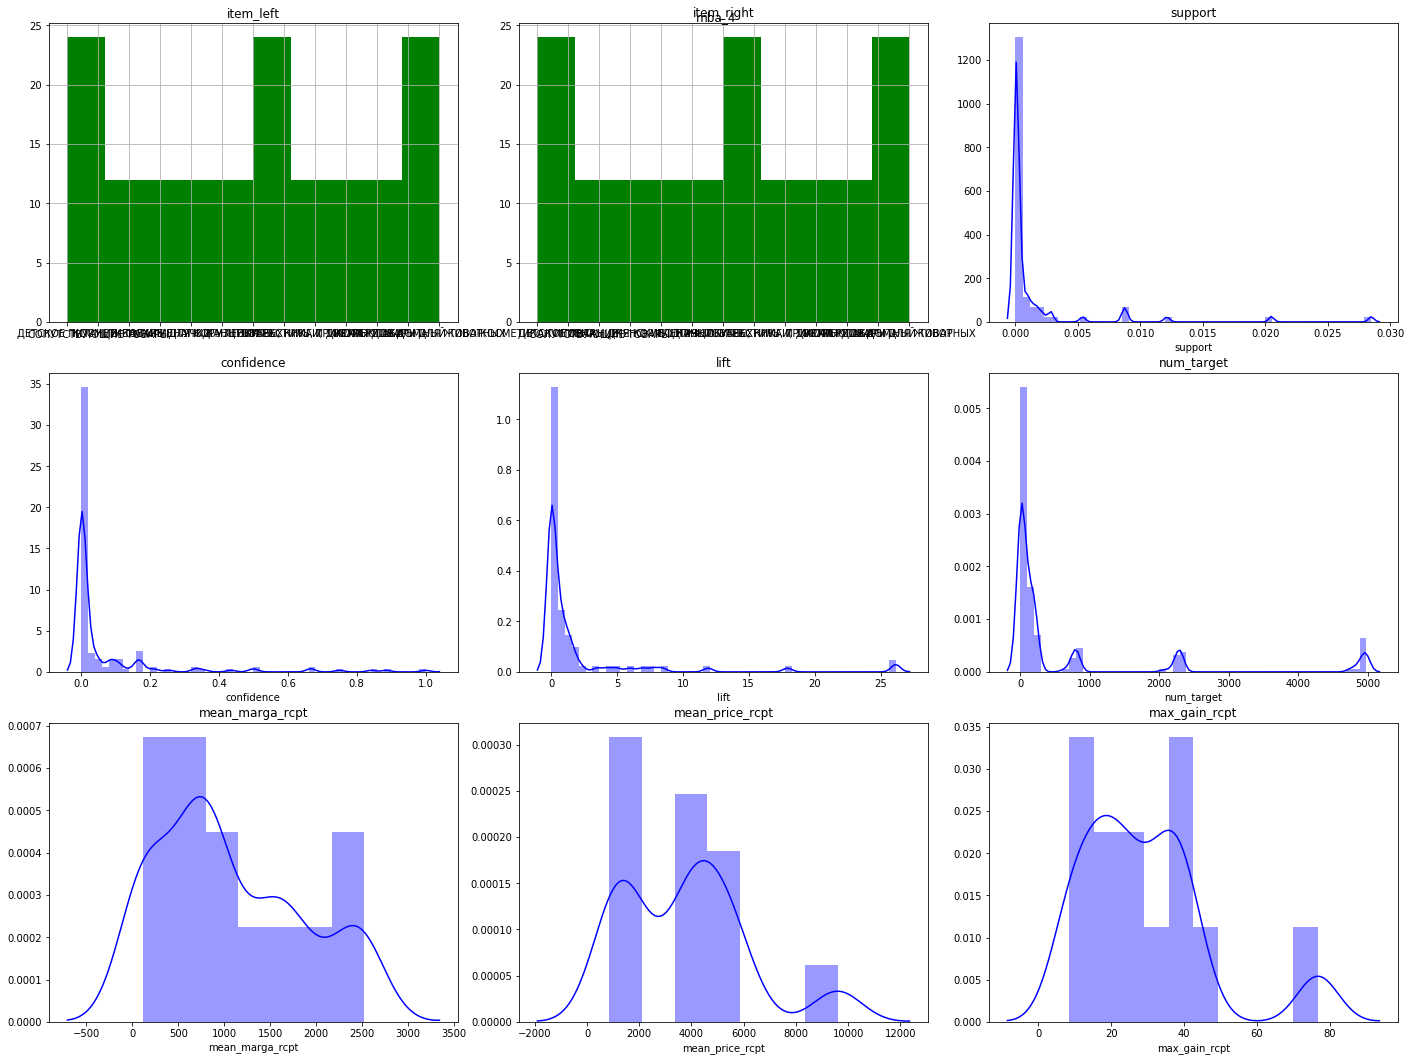

In [10]:
build_displots_without_nan(mba_4, mba_4.columns, n_col=3, name='mba_4')

In [59]:
mba_5 = pd.read_csv('../data/mba_segment_5.csv', index_col=[0])
mba_5 = add_income(mba_5)
mba_5 = mba_5[mba_5['lift'] > 1]
mba_5 = mba_5[mba_5['support'] >= 0.001]
mba_5 = mba_5.sort_values(by=['lift', 'confidence'], ascending=False)
mba_5

,item_left,item_right,support,confidence,lift,num_target,mean_marga_rcpt,mean_price_rcpt,max_gain_rcpt,income_0,income_5,income_10,income_15,income_20,income_25,income_30,income_35
15,ЖЕНСКИЕ ШТУЧКИ,КОСМЕТИКА/ГИГИЕНА,0.001005,0.481013,5.417126,41,100.09,655.13,15.28,4103.69,1328.19,682.18,36.18,-609.83,-1255.84,-1901.85,-2547.86
49,КОСМЕТИКА/ГИГИЕНА,ЖЕНСКИЕ ШТУЧКИ,0.001005,0.011323,5.417126,3318,84.15,239.72,35.10,279209.70,2710.87,2260.56,1810.25,1359.94,909.63,459.32,9.01
59,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,0.018547,0.208880,2.148192,2655,154.73,1071.15,14.45,410808.15,56136.16,26434.49,-3267.18,-32968.86,-62670.53,-92372.20,-122073.87
148,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,0.018547,0.190748,2.148192,2974,100.09,655.13,15.28,297667.66,38205.18,19622.89,1040.61,-17541.68,-36123.96,-54706.25,-73288.53
54,КОСМЕТИКА/ГИГИЕНА,ПОДГУЗНИКИ,0.026750,0.301251,1.985664,2345,161.65,1817.01,8.90,379069.25,50060.36,-14119.59,-78299.54,-142479.49,-206659.44,-270839.39,-335019.34
88,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,0.026750,0.176317,1.985664,4723,100.09,655.13,15.28,472725.07,56083.10,28805.33,1527.56,-25750.22,-53027.99,-80305.76,-107583.54
98,СОПУТСТВУЮЩИЕ ТОВАРЫ,ИГРУШКИ,0.002249,0.639098,1.818878,48,300.99,1449.00,20.77,14447.52,7009.85,4787.32,2564.80,342.27,-1880.26,-4102.78,-6325.31
31,ИГРУШКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,0.002249,0.006401,1.818878,13195,132.54,374.68,35.37,1748865.30,9610.27,8028.07,6445.87,4863.68,3281.48,1699.28,117.08
6,ДЕТСКОЕ ПИТАНИЕ,ПОДГУЗНИКИ,0.014658,0.273986,1.805948,1468,161.65,1817.01,8.90,237302.20,28502.08,-8039.05,-44580.18,-81121.31,-117662.44,-154203.57,-190744.71
84,ПОДГУЗНИКИ,ДЕТСКОЕ ПИТАНИЕ,0.014658,0.096617,1.805948,5180,91.18,1444.90,6.31,472312.40,9473.07,-26683.70,-62840.47,-98997.24,-135154.01,-171310.78,-207467.55


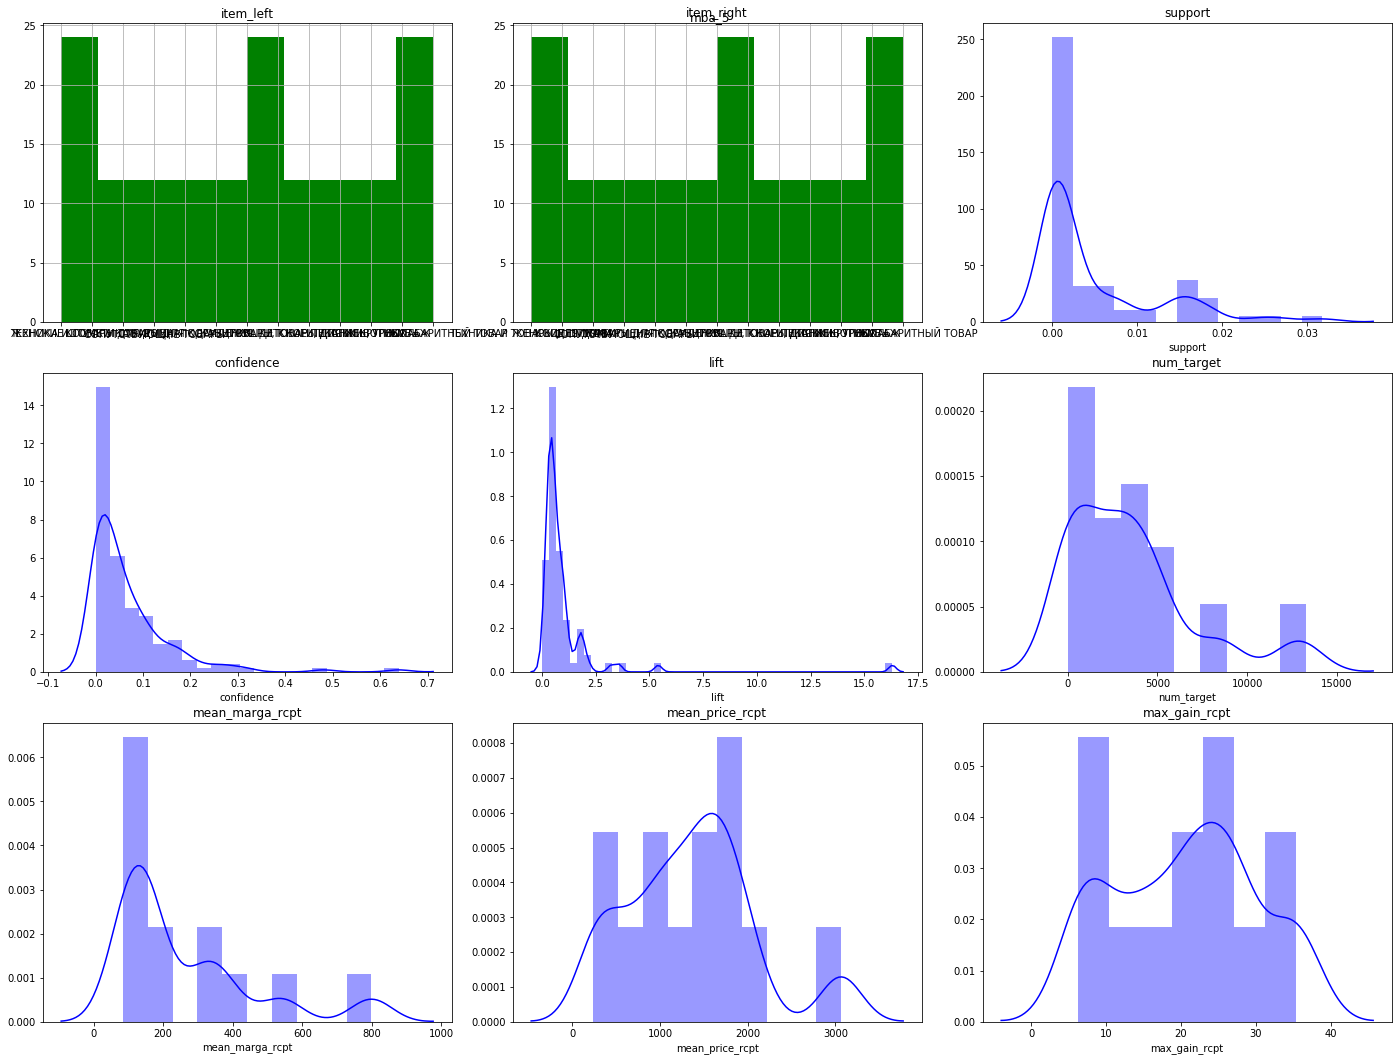

In [11]:
build_displots_without_nan(mba_5, mba_5.columns, n_col=3, name='mba_5')